
# Getting started with Python


**ACINN workshop**

*Tue 31.01.2017*

Fabien Maussion

<img src="./figures/acinn_logo_large.png" width="30%"  align="center">

<br>

Slides: <a href="http://fabienmaussion.info/acinn_python_workshop">http://fabienmaussion.info/acinn_python_workshop</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Outline

1. Why this workshop?
2. Switching to python: benefits, drawbacks and pitfalls
3. Getting started
  * Major differences with other languages
  * The scientific python ecosystem
  * Installing Python
  * Integrated development environment
4. If interest:
  * discover Python with the Notebook 
  * install party!

# Why this workshop?

- Helping beginners or long-time matlab/R users to make the first steps towards python

- There are plenty of good Python tutorials online, but some information is outdated and confusing: this is less a problem for the syntax (which doesn't change) than for the python installation (which has greatly improved in the last months/years)

- Synergy effects: shared tools and methods ⇨ more efficient research

# What is this workshop not supposed to be?

- a course about the Python syntax

- Matlab/IDL/R bashing

- a monologue

# Switching to python: benefits 

- *free* and **open-source**

- powerful, all-purpose language with a great syntax

- **scientific ecosystem and large user base** (including ACINN)

- "low-risk investment": python is going to stay around for a while

- Open-source (including Python) is the **future of scientific research** (keyword: open science)

# Switching to python: drawbacks 

- learning curve can be steep when coming from IDL/Matlab

- your existing tools will be difficult to translate

- many (many) tools & packages of variable quality: not easy to know which to use 

- not always consitent: doc for packages spread on various websites, learning without internet almost impossible

# The three stages of the transition

<img src="./figures/xkcd_learning_curve_wa.png" width="100%"  align="center">

# Avoiding pitfalls 

- Be patient: do not expect to be productive on the first day (and not on the first week either)

- **DO NOT** translate your existing code: pick a new project instead (i.e. for a new dataset you are analysing, a new paper you are writing)

- Get some help when frustration kicks in

- Python is no golden egg: a transition must be planned and might not always be the best move for your project/career/etc.

# Major differences with other languages 

- Syntax (of course)

- The ``import`` mechanism 

- No "all-in-one" development environment like Matlab

- Out of the box, Python is no good for science

In [2]:
a = [1, 2, 3]
a + a

[1, 2, 3, 1, 2, 3]

In [3]:
a * 4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

# The scientific python ecosystem

<img src="./figures/scipy_ecosystem.png" width="100%"  align="center">

In [4]:
import numpy as np  # central tool for vectorized operations
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [5]:
a * 4

array([ 4,  8, 12])

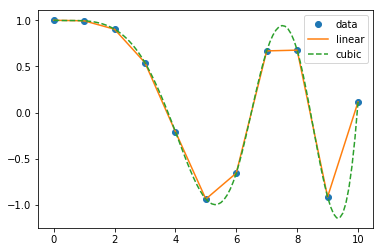

In [6]:
from scipy.interpolate import interp1d  # scientific "toolbox"
import matplotlib.pyplot as plt  # plotting like in matlab
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, 101, endpoint=True)
plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best');

# Installing python 

## Python 2 or Python 3?

Short answer: **use Python 3**

Long answer: there is absolutely no reason for a beginner to use Python 2. The Py2/Py3 problem is unfortunate, but Python 3 is better in all aspects. The only reason why people still use Python 2 is when they have a heavy bagage of old (untested) code. 

<small>
*If you need to use a software which is py2 only, try to contact the author of the package (or use another package).*</small>

## Installing Python: the complicated way

- On windows: go to the python webpage, download python, etc.
- On linux/mac, python is installed per default

- But ... how to install the packages?
- ``apt-get install numpy`` will work, but it will be outdated and the installation is frozen

##  Installing Python: the recommended way

Use the [conda](https://conda.io) package manager, installed via [miniconda](https://conda.io/miniconda.html)

- platform independant
- fully operational python installation in one single directory
- installing new packages is easy
- beginner friendly: **it is impossible to break anything**. In case of doubt, delete the install directory and see what happens (answer: not much).

# conda: getting started

Download: https://conda.io/miniconda.html

Installation: https://conda.io/docs/install/quick.html

Tutorial: https://conda.io/docs/test-drive.html

First thing to do after install:

```shell
conda config --add channels conda-forge
```

[conda forge](https://conda-forge.github.io/) is the best source for scientific python packages.

## Virtual environments

In [7]:
import xarray
xarray.__file__  # tells me where the file is located

'/home/mowglie/.bin/conda/envs/python_demo/lib/python3.5/site-packages/xarray/__init__.py'

- isolated environments where you can play around and brake things if you want
- allows to install different package versions at the same time
- become more useful with time

## pip, conda, or both?

[pip](https://pip.pypa.io/en/stable/) is the standard (traditional) way to install python packages. It works well for pure python packages, but is limited when it comes to complex packages with non-python dependencies (e.g. NetCDF, GDAL...).

Conda will install *binaries*, meaning that it will ship with all packages dependencies in the same bundle.  

The good news is that ``pip install my-special-package`` will work in a conda environment! This is not true the other way around (pip doesn't know about conda), and in general you shouldn't use ``pip`` yourselves (unless the package you want to install is not on conda).

# Some of my favorite packages

[pandas](http://pandas.pydata.org/) : working with tabular data

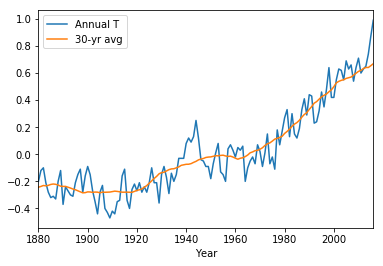

In [8]:
import pandas as pd
ts = pd.read_csv('GLB.Ts+dSST.csv', index_col=0, header=1)['J-D']
ts.plot(label='Annual T')
ts.rolling(window=31, center=True, min_periods=1).mean().plot(label='30-yr avg')
plt.legend(loc='upper left');

[xarray](http://xarray.pydata.org): pandas, but for N-Dimensions and netcdf files

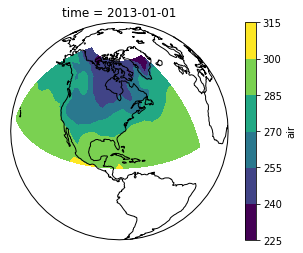

In [9]:
import xarray as xr
import cartopy.crs as ccrs
air = xr.tutorial.load_dataset('air_temperature').air
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

Workshop next week!

[scipy](https://docs.scipy.org/): all the scientific stuff

[matplotlib](http://matplotlib.org/): plotting *à la Matlab*

[cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html): plotting on maps

[salem](http://salem.readthedocs.io/en/latest/): projection transformations and WRF files

[statsmodels](http://www.statsmodels.org) and [scikit-learn](http://scikit-learn.org/): statistical models and machine learning

...

# Developing in Python

With this you should be able to get started right away:

```bash
conda install ipython jupyter spyder
```

- [ipython](http://ipython.org/): interactive console
- [jupyter](http://jupyter.org/): notebooks for exploration and sharing
- [spyder](https://pythonhosted.org/spyder/): "Matlab-like" IDE

**Demo**: notebook, first module

"Advanced" IDE: [pycharm](https://www.jetbrains.com/pycharm/) (free version)

(my personnal choice over spyder)

# Thanks for your attention!

**Questions?**

Discussion:
- should we set-up a mailing list for programming related questions?
- would there be interest for another workshop of this type? About what?
- how can we coordinate our efforts for better software practices?

# Let's get our hands dirty!

<small>
**Install python on your laptop:**

https://github.com/fmaussion/teaching/blob/master/install_python.rst

<br>

**Install python on the computer room (linux terminal):**

```shell
  $ gedit ~/.bashrc
```

At the end of this file, add the following two lines:

```shell
  # added for Fabien's course:
  export PATH="/scratch/c707/c7071047/miniconda3/bin:$PATH"
```

**Download the "getting started" notebook:**

https://raw.githubusercontent.com/fmaussion/teaching/master/python_intro_acinn/Getting_Started.ipynb 
(*use "save link as"*)

**Start the notebook interface:**

```shell
  $ jupyter-notebook
```

</small>